In [2]:
import os
import sys

root_path = os.path.abspath("..")  
if root_path not in sys.path:
    sys.path.insert(0, root_path)
os.chdir("..")

In [27]:
from config.constants import ACRONYM_LABELS

In [3]:
from data.loader import load_complete_dataset
from data.preprocessing import add_module_columns
dataset=load_complete_dataset()
dataset=add_module_columns(dataset)
dataset.shape

(3930798, 16)

In [ ]:
from sklearn.cluster import MiniBatchKMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1. Preprocessing (igual ao seu)
# Assumindo que 'dataset' é o seu DataFrame original
data_matrix = dataset[["accelerometer_module", "gyroscope_module", "magnetometer_module"]].to_numpy()
X_scaled = StandardScaler().fit_transform(data_matrix)


n_representatives = 20000
kmeans = MiniBatchKMeans(n_clusters=n_representatives, batch_size=10000, random_state=42)
kmeans.fit(X_scaled)
X_reps = kmeans.cluster_centers_




Clustering concluído!


A iniciar a Grid Search (Intervalo Alto: 0.20 - 0.60) nos X_reps...
Testado Eps: 0.20 | MinPts: 3 -> Score: -0.2099 (Clusters: 17)
Testado Eps: 0.20 | MinPts: 4 -> Score: -0.1844 (Clusters: 14)
Testado Eps: 0.20 | MinPts: 5 -> Score: -0.0893 (Clusters: 11)
Testado Eps: 0.20 | MinPts: 6 -> Score: -0.0355 (Clusters: 7)
Testado Eps: 0.20 | MinPts: 7 -> Score: 0.2197 (Clusters: 5)
Testado Eps: 0.20 | MinPts: 8 -> Score: -0.0680 (Clusters: 5)
Testado Eps: 0.20 | MinPts: 9 -> Score: 0.0916 (Clusters: 4)
Testado Eps: 0.21 | MinPts: 3 -> Score: -0.2094 (Clusters: 17)
Testado Eps: 0.21 | MinPts: 4 -> Score: -0.1386 (Clusters: 12)
Testado Eps: 0.21 | MinPts: 5 -> Score: 0.0363 (Clusters: 9)
Testado Eps: 0.21 | MinPts: 6 -> Score: -0.0462 (Clusters: 7)
Testado Eps: 0.21 | MinPts: 7 -> Score: 0.0302 (Clusters: 5)
Testado Eps: 0.21 | MinPts: 8 -> Score: 0.0904 (Clusters: 4)
Testado Eps: 0.21 | MinPts: 9 -> Score: 0.1972 (Clusters: 4)
Testado Eps: 0.22 | MinPts: 3 -> Score: -0.1849 (Clusters: 22)
Te

C:\Users\kille\AppData\Local\Temp\ipykernel_22240\1078164030.py:50: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(comb, S, 'bo-', color='black', markersize=4)


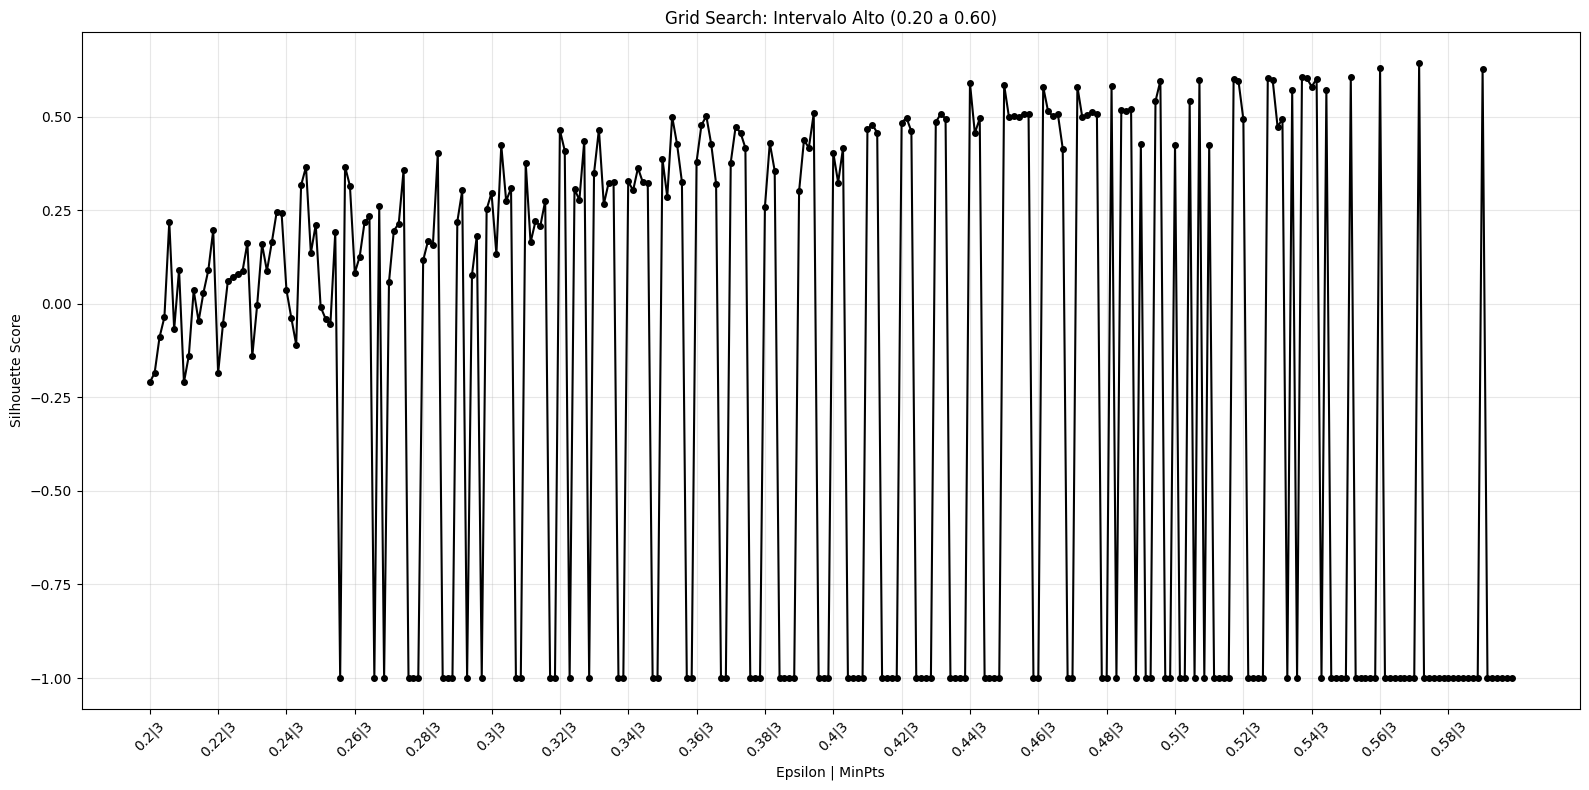


🏆 A melhor combinação neste intervalo foi: 0.57|4 com Score de 0.6439


In [54]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
import numpy as np

S = [] 
comb = [] 

# ==============================================================================
# NOVOS INTERVALOS (MAIS ALTOS)
# ==============================================================================
# range(20, 60) -> Vai testar Epsilon de 0.20 até 0.59
# Se continuar a dar o máximo no limite (0.59), teremos de aumentar mais.
eps_range = range(20, 60) 

# Ajustei ligeiramente para testar densidades de 3 a 9 pontos
minpts_range = range(3, 10) 

print("A iniciar a Grid Search (Intervalo Alto: 0.20 - 0.60) nos X_reps...")

for k in eps_range:
    for j in minpts_range:
        eps_val = k / 100.0
        
        model = DBSCAN(eps=eps_val, min_samples=j)
        
        # Treina nos REPRESENTANTES
        clm = model.fit(X_reps)
        
        # Verifica número de clusters (ignora se for só ruído ou só 1 cluster)
        unique_labels = set(clm.labels_)
        n_clusters = len(unique_labels) - (1 if -1 in clm.labels_ else 0)
        
        if n_clusters > 1 and n_clusters < len(X_reps):
            score = metrics.silhouette_score(X_reps, clm.labels_, metric='euclidean')
            
            S.append(score)
            comb.append(str(eps_val) + "|" + str(j))
            # Print para ir acompanhando o progresso
            print(f"Testado Eps: {eps_val:.2f} | MinPts: {j} -> Score: {score:.4f} (Clusters: {n_clusters})")
        else:
            S.append(-1)
            comb.append(str(eps_val) + "|" + str(j))
            # print(f"Testado Eps: {eps_val:.2f} -> Inválido") # Comentei para limpar o output

# ==============================================================================
# PLOT DO GRÁFICO
# ==============================================================================
plt.figure(figsize=(16, 8), dpi=100)
plt.plot(comb, S, 'bo-', color='black', markersize=4)
plt.xlabel('Epsilon | MinPts')
plt.ylabel('Silhouette Score')
plt.title('Grid Search: Intervalo Alto (0.20 a 0.60)')

# Ajuste visual: Se forem muitos pontos no eixo X, mostramos apenas alguns
if len(comb) > 20:
    plt.xticks(np.arange(0, len(comb), step=int(len(comb)/20)), rotation=45)
else:
    plt.xticks(rotation=45)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Encontrar o valor máximo
if len(S) > 0:
    max_score = max(S)
    max_index = S.index(max_score)
    print(f"\n🏆 A melhor combinação neste intervalo foi: {comb[max_index]} com Score de {max_score:.4f}")


In [ ]:
# Opção A: O Detalhado 
db_A = DBSCAN(eps=0.32, min_samples=4).fit(X_reps)

# Opção B: O Equilibrado (Novo!)
db_B = DBSCAN(eps=0.42, min_samples=3).fit(X_reps)

# Opção C: O Robusto (Novo!)
db_C = DBSCAN(eps=0.46, min_samples=6).fit(X_reps) # Escolhi 0.46|6 que deu score 0.5020

In [57]:
import pandas as pd


df = pd.read_csv("data/metaa/3_7.csv") # ou o nome que deu ao ficheiro

print("--- A PROCURA DE CLUSTERS EQUILIBRADOS ---")

candidatos = df[ (df['Clusters'] >= 3) & (df['Score'] > 0.10) ].copy()

# O SEGREDO: Vamos re-testar apenas estes candidatos para ver os tamanhos
from sklearn.cluster import DBSCAN
import numpy as np

melhores_opcoes = []

print(f"A analisar {len(candidatos)} candidatos promissores...")

for index, row in candidatos.iterrows():
    eps = row['Epsilon']
    min_pts = int(row['MinPts'])
    
    # Rodar rápido para ver contagens
    db = DBSCAN(eps=eps, min_samples=min_pts).fit(X_reps)
    
    # Contar pontos por cluster (excluindo ruído -1)
    labels = db.labels_
    unique, counts = np.unique(labels[labels != -1], return_counts=True)
    
    if len(counts) < 2: continue 
    

    counts.sort()

    segundo_maior = counts[-2] 
    
    if segundo_maior > 50:
        melhores_opcoes.append({
            'Eps': eps,
            'MinPts': min_pts,
            'Score': row['Score'],
            'Clusters_Reais': len(counts),
            'Tamanho_2o_Maior': segundo_maior,
            'Ruido': list(labels).count(-1)
        })

# Criar tabela final
df_final = pd.DataFrame(melhores_opcoes)
if not df_final.empty:
    df_final = df_final.sort_values(by='Score', ascending=False)
    print("\n🏆 VENCEDORES REAIS (Com clusters de tamanho saudável):")
    print(df_final.head(10))
else:
    print("Nenhum modelo passou no teste de equilíbrio. Tente baixar o MinPts ou aumentar o Eps.")

--- A PROCURA DE CLUSTERS EQUILIBRADOS ---
A analisar 70 candidatos promissores...
Nenhum modelo passou no teste de equilíbrio. Tente baixar o MinPts ou aumentar o Eps.


Melhor Modelo: Eps=0.57, MinPts=4, Score=0.6439
Total: 20000
Outliers: 274 (1.37%)
Distribuição dos Clusters:
0    19724
1        2
Name: count, dtype: int64


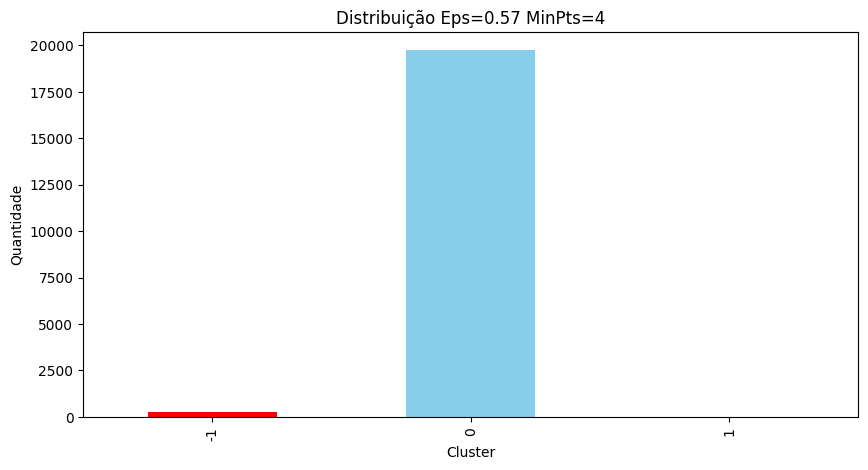

In [59]:

scores = pd.read_csv("data/metaa/3_7.csv") # ou o nome que deu ao ficheiro

best_model = scores.sort_values(by='Score', ascending=False).iloc[0]
best_eps = best_model['Epsilon']
best_minpts = int(best_model['MinPts'])
best_score = best_model['Score']

print(f"Melhor Modelo: Eps={best_eps}, MinPts={best_minpts}, Score={best_score:.4f}")

db = DBSCAN(eps=best_eps, min_samples=best_minpts)
labels = db.fit_predict(X_reps)

counts = pd.Series(labels).value_counts().sort_index()
n_outliers = counts.get(-1, 0)
total = len(X_reps)
pct_outliers = (n_outliers / total) * 100

print(f"Total: {total}")
print(f"Outliers: {n_outliers} ({pct_outliers:.2f}%)")
print("Distribuição dos Clusters:")
print(counts.drop(-1, errors='ignore'))

plt.figure(figsize=(10, 5))
colors = ['red' if x == -1 else 'skyblue' for x in counts.index]
counts.plot(kind='bar', color=colors)
plt.title(f'Distribuição Eps={best_eps} MinPts={best_minpts}')
plt.xlabel('Cluster')
plt.ylabel('Quantidade')
plt.show()